# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [5]:
# display cities
cities

['busselton',
 'makat',
 'puerto narino',
 'bluff',
 'rikitea',
 'itarema',
 'pahrump',
 'saldanha',
 'udachnyy',
 'barentsburg',
 'krosno odrzanskie',
 'hobart',
 'ribeira grande',
 'belushya guba',
 'formoso do araguaia',
 'awbari',
 'college',
 'atuona',
 'kruisfontein',
 'hasaki',
 'yerbogachen',
 'butaritari',
 'vaini',
 'mataura',
 'plouzane',
 'albany',
 'nome',
 'alma',
 'kaitangata',
 'illoqqortoormiut',
 'ewo',
 'port alfred',
 'taolanaro',
 'puerto ayora',
 'tual',
 'maamba',
 'nikolskoye',
 'mbeya',
 'larsnes',
 'carrickmacross',
 'luderitz',
 'hithadhoo',
 'la tuque',
 'hilo',
 'yazd',
 'maromitsa',
 'mareeba',
 'quatre cocos',
 'bhinmal',
 'north bend',
 'new norfolk',
 'sumenep',
 'castro',
 'nhulunbuy',
 'gat',
 'da lat',
 'husavik',
 'paita',
 'katsuura',
 'cairns',
 'namtsy',
 'tumannyy',
 'georgetown',
 'hermanus',
 'talnakh',
 'souillac',
 'mittagong',
 'minot',
 'attawapiskat',
 'yirol',
 'rauma',
 'ushuaia',
 'tasiilaq',
 'arraial do cabo',
 'nalut',
 'port august

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# -- do not use or run -- keep for reference on expected result

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

In [6]:
### Perform API Calls

####  TEMP for testing only:
city_name= 'yulara'

url=(f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
url

'https://api.openweathermap.org/data/2.5/weather?q=yulara&appid=d64f2833aec28689f5af36a76f9fa491'

In [7]:
url=(f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
url

'https://api.openweathermap.org/data/2.5/weather?q=yulara&appid=d64f2833aec28689f5af36a76f9fa491'

In [8]:
# Pretty print JSON for weather
response = requests.get(url).json()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": -25.2406,
        "lon": 130.9889
    },
    "dt": 1612591156,
    "id": 6355222,
    "main": {
        "feels_like": 299.51,
        "humidity": 20,
        "pressure": 1007,
        "temp": 304.15,
        "temp_max": 304.15,
        "temp_min": 304.15
    },
    "name": "Yulara",
    "sys": {
        "country": "AU",
        "id": 9487,
        "sunrise": 1612558553,
        "sunset": 1612605861,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 5.14
    }
}


In [10]:
# reference only -- # List for holding lat_lngs and cities
# cities = []

lat_lngs = []

for city in cities:
    url=(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}')
    response = requests.get(url).json()
    
    try:
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]

        lat_lng = {'latitude':lat,
                   'longitude':long}

        #print("lat", lat, "long", long)
    except:
        continue

    lat_lngs.append(lat_lng)
    
lat_lngs

[{'latitude': -33.65, 'longitude': 115.3333},
 {'latitude': 47.6469, 'longitude': 53.3463},
 {'latitude': -3.7703, 'longitude': -70.3831},
 {'latitude': -46.6, 'longitude': 168.3333},
 {'latitude': -23.1203, 'longitude': -134.9692},
 {'latitude': -2.9248, 'longitude': -39.9167},
 {'latitude': 36.2083, 'longitude': -115.9839},
 {'latitude': -33.0117, 'longitude': 17.9442},
 {'latitude': 66.4167, 'longitude': 112.4},
 {'latitude': 52.0549, 'longitude': 15.0988},
 {'latitude': -42.8794, 'longitude': 147.3294},
 {'latitude': 38.5167, 'longitude': -28.7},
 {'latitude': 26.5921, 'longitude': 12.7805},
 {'latitude': 64.8569, 'longitude': -147.8028},
 {'latitude': -9.8, 'longitude': -139.0333},
 {'latitude': -34.0033, 'longitude': 24.7314},
 {'latitude': 35.7333, 'longitude': 140.8333},
 {'latitude': 61.2767, 'longitude': 108.0108},
 {'latitude': 3.0707, 'longitude': 172.7902},
 {'latitude': -21.2, 'longitude': -175.2},
 {'latitude': -46.1927, 'longitude': 168.8643},
 {'latitude': 48.3833, 'lo

In [8]:
#### reference only for expected results   
lat_lngs

[{'latitude': 52.9166, 'longitude': 22.5171},
 {'latitude': -25.1667, 'longitude': 45.05},
 {'latitude': 62.456, 'longitude': -114.3525},
 {'latitude': -23.1203, 'longitude': -134.9692},
 {'latitude': 32.941, 'longitude': 50.121},
 {'latitude': 30.15, 'longitude': 62.6},
 {'latitude': -54.8, 'longitude': -68.3},
 {'latitude': -33.918, 'longitude': 25.5701},
 {'latitude': 18.8003, 'longitude': 110.3967},
 {'latitude': 39.05, 'longitude': -27.9833},
 {'latitude': -20.4081, 'longitude': 57.7},
 {'latitude': 4.9333, 'longitude': -52.3333},
 {'latitude': 23.7667, 'longitude': -98.2167},
 {'latitude': -17.7125, 'longitude': -39.2481},
 {'latitude': 34.7304, 'longitude': -86.5861},
 {'latitude': -32.3667, 'longitude': -54.1833},
 {'latitude': -46.6, 'longitude': 168.3333},
 {'latitude': 69.4865, 'longitude': 88.3972},
 {'latitude': -34.5322, 'longitude': 20.0403},
 {'latitude': 14.2, 'longitude': 24.6667},
 {'latitude': -21.2078, 'longitude': -159.775},
 {'latitude': 71.2906, 'longitude': -15

In [11]:
# display cities
cities

['busselton',
 'makat',
 'puerto narino',
 'bluff',
 'rikitea',
 'itarema',
 'pahrump',
 'saldanha',
 'udachnyy',
 'barentsburg',
 'krosno odrzanskie',
 'hobart',
 'ribeira grande',
 'belushya guba',
 'formoso do araguaia',
 'awbari',
 'college',
 'atuona',
 'kruisfontein',
 'hasaki',
 'yerbogachen',
 'butaritari',
 'vaini',
 'mataura',
 'plouzane',
 'albany',
 'nome',
 'alma',
 'kaitangata',
 'illoqqortoormiut',
 'ewo',
 'port alfred',
 'taolanaro',
 'puerto ayora',
 'tual',
 'maamba',
 'nikolskoye',
 'mbeya',
 'larsnes',
 'carrickmacross',
 'luderitz',
 'hithadhoo',
 'la tuque',
 'hilo',
 'yazd',
 'maromitsa',
 'mareeba',
 'quatre cocos',
 'bhinmal',
 'north bend',
 'new norfolk',
 'sumenep',
 'castro',
 'nhulunbuy',
 'gat',
 'da lat',
 'husavik',
 'paita',
 'katsuura',
 'cairns',
 'namtsy',
 'tumannyy',
 'georgetown',
 'hermanus',
 'talnakh',
 'souillac',
 'mittagong',
 'minot',
 'attawapiskat',
 'yirol',
 'rauma',
 'ushuaia',
 'tasiilaq',
 'arraial do cabo',
 'nalut',
 'port august

In [36]:
# starter code -- reference
# export the city data to a csv file
# cities.to_csv('cities_file.csv') 
# cities[7]

'port elizabeth'

In [47]:
#cities

['wysokie mazowieckie',
 'beloha',
 'yellowknife',
 'rikitea',
 'fereydunshahr',
 'rudbar',
 'ushuaia',
 'port elizabeth',
 'wanning',
 'lagoa',
 'mahebourg',
 'cayenne',
 'soto la marina',
 'caravelas',
 'huntsville',
 'melo',
 'bluff',
 'talnakh',
 'bredasdorp',
 'kutum',
 'avarua',
 'barrow',
 'mayna',
 'juneau',
 'hilo',
 'nikolskoye',
 'bathsheba',
 'hermanus',
 'victor harbor',
 'madras',
 'kapaa',
 'mataura',
 'esperance',
 'coihaique',
 'pisco',
 'saskylakh',
 'naantali',
 'yenagoa',
 'nacala',
 'punta arenas',
 'hobart',
 'berlevag',
 'gari',
 'east london',
 'evensk',
 'cooma',
 'nova olinda do norte',
 'jumla',
 'vaini',
 'burnie',
 'luau',
 'anadyr',
 'morros',
 'iqaluit',
 'qaanaaq',
 'kangalassy',
 'chuy',
 'kodiak',
 'santa cruz del sur',
 'mamallapuram',
 'carnarvon',
 'belushya guba',
 'springdale',
 'saleaula',
 'apodi',
 'ulladulla',
 'pecos',
 'albany',
 'weligama',
 'saint-philippe',
 'busselton',
 'ilulissat',
 'georgetown',
 'nouadhibou',
 'puerto ayora',
 'castr

In [31]:
# export the city data to a csv file
import csv

# Specify the file to write to
output_path = "output_data/cities_file.csv"

## test run only
cities1 = ["mahebourg", "port elizabeth", "yulara"]

#### Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 
                        'Max Temp', 'Wind Speed'])
    
    # read cities file, get all the values from the API response and write rows to the cities_file
    
    for city in cities1:
           
        url=(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}')
        response = requests.get(url).json()
    
        city_id = response["sys"]["id"]
        
        cloudiness = response["clouds"]["all"]
        
        country = response["sys"]["country"]
        
        date = response["dt"]
        
        humidity = response["main"]["humidity"]
        
        lat = response["coord"]["lat"]
        
        long = response["coord"]["lon"]
        
        max_temp = response["sys"]["country"]
        
        wind_speed = response["wind"]["speed"]

        print(city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed)

        #csvwriter.writerow([city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed])            
        
        csvwriter.writerow([city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed])
             
#### example:  expected result:
#### 47	port elizabeth	20	US	1558378762	46	39.31	-74.98	93	12.75    

#City_ID	City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
#0	ostrovnoy	2	RU	1558378754	72	68.05	39.51	37.5	7.16
#1	mahebourg	75	MU	1558378503	74	-20.41	57.7	78.8	11.41


In [32]:
# full run of cities

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 
                        'Max Temp', 'Wind Speed'])
    
    # read cities file, get all the values from the API response and write rows to the cities_file
    
    for city in cities:
        url=(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}')
        response = requests.get(url).json()
        try:
            city_id = response["sys"]["id"]
            cloudiness = response["clouds"]["all"]
            country = response["sys"]["country"]
            date = response["dt"]
            humidity = response["main"]["humidity"]
            lat = response["coord"]["lat"]
            long = response["coord"]["lon"]
            max_temp = response["main"]["temp_max"]
            wind_speed = response["wind"]["speed"]
            print(city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed)
            csvwriter.writerow([city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed])
        except:
            continue

2008303 busselton 100 AU 1612595343 62 -33.65 115.3333 294.26 1.79
8600 puerto narino 90 CO 1612595344 100 -3.7703 -70.3831 296.15 0.98
3852 pahrump 1 US 1612595321 32 36.2083 -115.9839 283.15 4.12
1943 saldanha 0 ZA 1612595346 88 -33.0117 17.9442 292.15 6.17
1714 krosno odrzanskie 0 PL 1612595347 74 52.0549 15.0988 271.48 5.66
9545 hobart 75 AU 1612594883 49 -42.8794 147.3294 295.15 7.72
7683 college 75 US 1612595349 70 64.8569 -147.8028 249.15 2.06
2035063 kruisfontein 0 ZA 1612595350 65 -34.0033 24.7314 299.26 0.89
7955 hasaki 20 JP 1612595350 29 35.7333 140.8333 290.37 2.57
7285 vaini 40 TO 1612595351 100 -21.2 -175.2 299.15 1.54
6554 plouzane 0 FR 1612595352 93 48.3833 -4.6167 277.15 1.54
3273 albany 75 US 1612595217 80 42.6001 -73.9662 271.48 6.17
7770 nome 90 US 1612595353 93 64.5011 -165.4064 269.15 5.14
319 alma 89 CA 1612595192 93 48.5501 -71.6491 269.15 5.66
2011314 port alfred 92 ZA 1612595355 85 -33.5906 26.891 297.59 1.79
2005652 puerto ayora 18 EC 1612595356 96 -0.7393 -

2005410 pochutla 66 MX 1612595556 91 15.7432 -96.4661 297.04 0.89
9426 ayer tawar 20 MY 1612595557 58 4.2954 100.7548 306.15 1.54
1600 strandby 81 DK 1612595558 86 57.4915 10.4961 268.15 3.6
8682 lima 75 PE 1612595290 88 -12.0432 -77.0282 295.37 3.6
3729 hamilton 90 US 1612595195 80 39.1834 -84.5333 273.15 5.14
1007 yellowknife 20 CA 1612595561 74 62.456 -114.3525 233.15 2.06
2016171 cabo san lucas 3 MX 1612595521 44 22.8909 -109.9124 291.48 0.45
2127 saint-pierre 0 RE 1612595562 66 -21.3393 55.4781 303.15 4.12
1189 tahoua 0 NE 1612595563 17 14.8888 5.2692 293.15 3.09
7025 yuksekova 20 TR 1612595564 100 37.5736 44.2872 271.15 1.54
1563 skibbereen 75 IE 1612595565 87 51.55 -9.2667 277.15 3.6
2444 nouadhibou 20 MR 1612595567 77 20.931 -17.0347 289.15 5.14
2002027 corinto 0 GR 1612595567 54 37.9407 22.9573 288.15 0.45
3354 marathon 1 US 1612595567 71 44.9 -89.7668 256.15 4.12
8986 megion 90 RU 1612595569 93 61.0296 76.1136 269.15 6
9154 victoria 20 HK 1612595282 38 22.2855 114.1577 298.15

1438 brae 75 GB 1612595564 64 60.3964 -1.353 274.15 10.29
894 kenora 75 CA 1612595438 77 49.8167 -94.4337 248.15 6.17
3860 del rio 1 US 1612595668 71 29.3627 -100.8968 283.15 3.09
998 bay roberts 90 CA 1612595669 93 47.5999 -53.2648 273.71 9.77
9014 komsomolskiy 100 UZ 1612595669 46 40.4272 71.7189 282.15 1.56
9421 pontianak 75 ID 1612595669 79 -0.0333 109.3333 303.15 4.12
2380 nador 40 MA 1612595670 72 35.174 -2.9287 287.15 1.54
9605 nelson bay 100 AU 1612595672 94 -32.7167 152.15 295.37 3.09
2031658 changzhou 0 CN 1612595672 50 31.7833 119.9667 293.15 0.89
7441 do gonbadan 0 IR 1612595673 30 30.3586 50.7981 293.15 3.09
2016092 weatherford 0 US 1612595509 80 32.7593 -97.7972 279.82 1.34
4747 lompoc 1 US 1612595486 93 34.6391 -120.4579 285.37 4.12
4590 jasper 1 US 1612595674 74 37.2001 -94.3502 273.71 3.6
8315 san carlos de bariloche 0 AR 1612595675 58 -41.1456 -71.3082 287.15 1.54
6895 praia da vitoria 20 PT 1612595675 88 38.7333 -27.0667 287.15 6.43
4761 mount pleasant 90 US 16125953

#### how to handle timeout???

        except TimeoutError:
            print("Caught a timeout...")
            continue

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [96]:
# Cities data file
cities_data_path = "output_data/cities_file.csv"
cities_data_path

# read the cities file and put in a pandas dataframe
cities_df = pd.read_csv(cities_data_path)
cities_df.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2008303,busselton,100,AU,1612595343,62,-33.6500,115.3333,294.26,1.79
1,8600,puerto narino,90,CO,1612595344,100,-3.7703,-70.3831,296.15,0.98
2,3852,pahrump,1,US,1612595321,32,36.2083,-115.9839,283.15,4.12
3,1943,saldanha,0,ZA,1612595346,88,-33.0117,17.9442,292.15,6.17
4,1714,krosno odrzanskie,0,PL,1612595347,74,52.0549,15.0988,271.48,5.66


In [97]:
#  NEED HELP -- temperature conversion & column update

new_df = cities_df

#maxtemp = 294.26
#temp_f = (maxtemp - 273.15) * 9/5 +32
#temp_f

for ind in new_df.index: 
    maxtemp = new_df['Max Temp'][ind]
    temp_f = (maxtemp - 273.15) * 9/5 +32
    new_df['Max Temp'][ind] = temp_f
    print(temp_f)
    print(new_df['Max Temp'][ind], ind) 
new_df

69.99800000000002
69.99800000000002 0
73.4
73.4 1
50.0
50.0 2
66.2
66.2 3
28.994000000000074
28.994000000000074 4
71.6
71.6 5
-11.199999999999946
-11.199999999999946 6
78.99800000000002
78.99800000000002 7
62.99600000000005
62.99600000000005 8
78.8
78.8 9
39.2
39.2 10
28.994000000000074
28.994000000000074 11
24.8
24.8 12
24.8
24.8 13
75.99199999999999
75.99199999999999 14
75.00200000000008
75.00200000000008 15
10.994000000000074
10.994000000000074 16
23.0
23.0 17
42.008
42.008 18
24.8
24.8 19
68.0
68.0 20
53.6
53.6 21
87.00800000000001
87.00800000000001 22
82.99400000000007
82.99400000000007 23
44.99600000000005
44.99600000000005 24
71.6
71.6 25
84.2
84.2 26
60.008
60.008 27
33.8
33.8 28
62.99600000000005
62.99600000000005 29
87.00800000000001
87.00800000000001 30
-34.59999999999995
-34.59999999999995 31
91.4
91.4 32
75.00200000000008
75.00200000000008 33
82.4
82.4 34
77.0
77.0 35
-11.199999999999946
-11.199999999999946 36
15.8
15.8 37
41.0
41.0 38
28.4
28.4 39
77.0
77.0 40
64.00400000

<ipython-input-97-501120f3d662>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Max Temp'][ind] = temp_f


,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2008303,busselton,100,AU,1612595343,62,-33.6500,115.3333,69.998,1.79
1,8600,puerto narino,90,CO,1612595344,100,-3.7703,-70.3831,73.400,0.98
2,3852,pahrump,1,US,1612595321,32,36.2083,-115.9839,50.000,4.12
3,1943,saldanha,0,ZA,1612595346,88,-33.0117,17.9442,66.200,6.17
4,1714,krosno odrzanskie,0,PL,1612595347,74,52.0549,15.0988,28.994,5.66
...,...,...,...,...,...,...,...,...,...,...
289,4481,sterling,20,US,1612595688,64,39.0062,-77.4286,30.200,2.57
290,1619,finnsnes,75,NO,1612595688,74,69.2296,17.9811,26.600,3.09
291,6616,megali vrisi,0,GR,1612595690,67,35.1344,25.0209,64.004,3.60
292,7974,mutsu,75,JP,1612595690,81,41.2894,141.2169,39.992,2.57


In [129]:
#  NEED HELP -- date conversion & column update

#testing
#new_df[.to_datetime('1612595343', format='%Y%m%d', errors='ignore')
       
#df['Dates'] = pd.to_datetime(df['Dates'], format='%Y%m%d') 

       
#new_df['Date'] = pd.to_datetime(new_df['Date'], format='%y%m%d', errors='ignore')

new_df['Date'] = pd.to_datetime(1612595343, format='%y%m%d', errors='ignore')

new_df       

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2008303,busselton,100,AU,1612595343,62,-33.6500,115.3333,69.998,1.79
1,8600,puerto narino,90,CO,1612595343,100,-3.7703,-70.3831,73.400,0.98
2,3852,pahrump,1,US,1612595343,32,36.2083,-115.9839,50.000,4.12
3,1943,saldanha,0,ZA,1612595343,88,-33.0117,17.9442,66.200,6.17
4,1714,krosno odrzanskie,0,PL,1612595343,74,52.0549,15.0988,28.994,5.66
...,...,...,...,...,...,...,...,...,...,...
289,4481,sterling,20,US,1612595343,64,39.0062,-77.4286,30.200,2.57
290,1619,finnsnes,75,NO,1612595343,74,69.2296,17.9811,26.600,3.09
291,6616,megali vrisi,0,GR,1612595343,67,35.1344,25.0209,64.004,3.60
292,7974,mutsu,75,JP,1612595343,81,41.2894,141.2169,39.992,2.57


In [44]:
# create a subset
subset_cities_df = cities_df[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
subset_cities_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,-33.6500,115.3333,294.26,62,100,1.79,AU,1612595343
1,-3.7703,-70.3831,296.15,100,90,0.98,CO,1612595344
2,36.2083,-115.9839,283.15,32,1,4.12,US,1612595321
3,-33.0117,17.9442,292.15,88,0,6.17,ZA,1612595346
4,52.0549,15.0988,271.48,74,0,5.66,PL,1612595347
...,...,...,...,...,...,...,...,...
289,39.0062,-77.4286,272.15,64,20,2.57,US,1612595688
290,69.2296,17.9811,270.15,74,75,3.09,NO,1612595688
291,35.1344,25.0209,290.93,67,0,3.60,GR,1612595690
292,41.2894,141.2169,277.59,81,75,2.57,JP,1612595690


In [45]:
# Describe the dataframe
subset_cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,2.940000e+02
mean,23.061967,-7.427472,282.885408,73.755102,48.003401,3.641871,1.612596e+09
std,33.257245,88.549626,16.009337,19.174283,38.246684,2.586342,1.464623e+02
min,-54.800000,-175.200000,231.150000,10.000000,0.000000,0.050000,1.612595e+09
25%,-6.017075,-81.736900,273.150000,63.250000,1.000000,1.707500,1.612595e+09
50%,34.276400,-2.642350,285.150000,77.000000,40.000000,3.090000,1.612596e+09
75%,47.649925,53.742300,295.370000,88.000000,90.000000,4.980000,1.612596e+09
max,78.218600,177.483300,309.150000,100.000000,100.000000,13.860000,1.612596e+09


In [16]:
#### DO NOT RUN -- display for sample reference only

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
cities_humidity_gt_100_df = cities_df[cities_df["Humidity"] >= 100]
cities_humidity_gt_100_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,8600,puerto narino,90,CO,1612595344,100,-3.7703,-70.3831,296.15,0.98
9,7285,vaini,40,TO,1612595351,100,-21.2000,-175.2000,299.15,1.54
24,5239,north bend,75,US,1612595362,100,43.4065,-124.2243,280.37,1.54
27,2002441,gat,4,IL,1612595364,100,31.6100,34.7642,288.71,0.05
45,8927,polyarnyy,75,RU,1612595374,100,69.1989,33.4478,265.15,9.07
89,9505,carnarvon,40,AU,1612595377,100,-24.8667,113.6333,304.15,9.26
107,7741,ketchikan,90,US,1612595531,100,55.3422,-131.6461,274.15,0.46
124,6407,tudela,90,ES,1612595549,100,42.0617,-1.6045,282.15,3.09
140,7025,yuksekova,20,TR,1612595564,100,37.5736,44.2872,271.15,1.54
162,4127,fortuna,90,US,1612595581,100,40.5982,-124.1573,283.15,2.06


In [48]:
# Inspect the data and remove the cities where the humidity > 100%

cities_humidity_le_100_df = cities_df

index_names = cities_humidity_le_100_df[ cities_humidity_le_100_df['Humidity'] > 100].index 
  
# drop these row indexes from dataFrame 
cities_humidity_le_100_df.drop(index_names, inplace = True) 
cities_humidity_le_100_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2008303,busselton,100,AU,1612595343,62,-33.6500,115.3333,294.26,1.79
1,8600,puerto narino,90,CO,1612595344,100,-3.7703,-70.3831,296.15,0.98
2,3852,pahrump,1,US,1612595321,32,36.2083,-115.9839,283.15,4.12
3,1943,saldanha,0,ZA,1612595346,88,-33.0117,17.9442,292.15,6.17
4,1714,krosno odrzanskie,0,PL,1612595347,74,52.0549,15.0988,271.48,5.66
...,...,...,...,...,...,...,...,...,...,...
289,4481,sterling,20,US,1612595688,64,39.0062,-77.4286,272.15,2.57
290,1619,finnsnes,75,NO,1612595688,74,69.2296,17.9811,270.15,3.09
291,6616,megali vrisi,0,GR,1612595690,67,35.1344,25.0209,290.93,3.60
292,7974,mutsu,75,JP,1612595690,81,41.2894,141.2169,277.59,2.57


In [6]:
#### DO NOT RUN -- display for sample reference only

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [162]:
#  NEED HELP -- Get the indices of cities that have humidity over 100%.
index_cities_humid_over100 = cities_df[ cities_df['Humidity'] > 100].index 
index_cities_humid_over100

Int64Index([], dtype='int64')

In [163]:
cities_df[ cities_df['Humidity'] > 100]

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [17]:
#### DO NOT RUN -- display for sample reference only

#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [164]:
#### DO NOT RUN -- display for sample reference only

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [211]:
# Latitude vs. Temperature Plot
lat=cities_df['Lat']
lat

0     -33.6500
1      -3.7703
2      36.2083
3     -33.0117
4      52.0549
        ...   
289    39.0062
290    69.2296
291    35.1344
292    41.2894
293    41.0002
Name: Lat, Length: 294, dtype: float64

In [212]:
# get latitude min & max for x axis
min_lat = lat.min()
min_lat

-54.8

In [213]:
max_lat = lat.max()
max_lat

78.2186

In [214]:
temp=cities_df['Max Temp']
temp

0      69.998
1      73.400
2      50.000
3      66.200
4      28.994
        ...  
289    30.200
290    26.600
291    64.004
292    39.992
293    30.002
Name: Max Temp, Length: 294, dtype: float64

In [215]:
# get Temperatrue min & max for y axis
min_temp = temp.min()
min_temp

-43.59999999999995

In [216]:
max_temp = temp.max()
max_temp

96.8

<IPython.core.display.Javascript object>


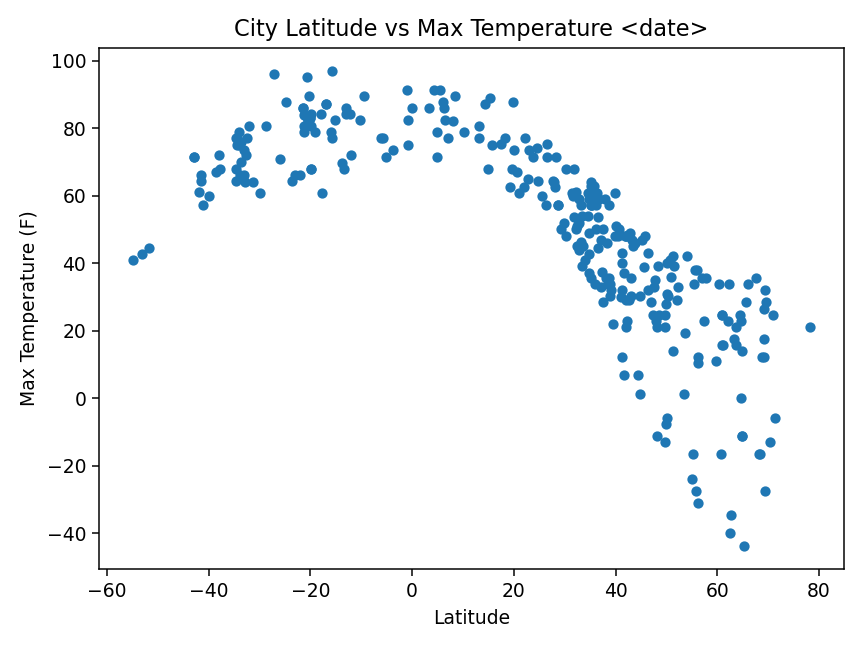

<function matplotlib.pyplot.close(fig=None)>

In [250]:
#### scatter plot using pandas --

cities_df.plot(kind="scatter", x='Lat', y='Max Temp')

plt.title("City Latitude vs Max Temperature <date>")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Temp_plot.png")

#plt.legend()
plt.close

<IPython.core.display.Javascript object>


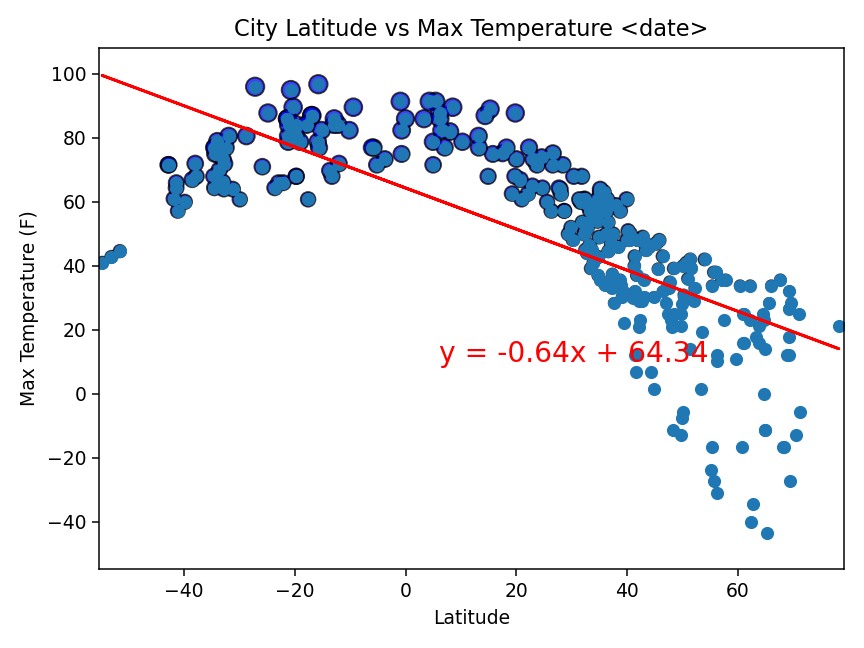

C:\Users\mbarr\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [217]:
# Create Scatter Pot -- Latitude vs. Temperature Plot

# enable matplotlib so that the correlation / regression line can be drawn over the scatter plot

%matplotlib notebook 

#----------------------------------------------
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

from scipy.stats import sem
#----------------------------------------------

# variables for chart data
x_data = cities_df['Lat']
y_data = cities_df['Max Temp']

#----------------------------------------------

# The maximum x value for our chart will be 25
x_limit = max_lat

# List of values 
x_axis = np.arange(min_lat, x_limit, 2)

# Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]

data = lat

# Tells matplotlib to create a scatter plot
# The size of each point on our plot is determined by their x value

plt.scatter(x_data, y_data, marker="o", facecolors="blue", edgecolors="black", s=y_data, alpha=0.75)
            
# x limits of scatter plot
#plt.xlim(lat_min-0.5, lat_max+0.9)   

plt.xlim(min_lat-0.5, max_lat+0.9)   

# y limits of scatter plot
plt.ylim(temp_min-0.1, temp_max+30)

# Set a Title and labels
plt.title("City Latitude vs Max Temperature <date>")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Temp_plot.png")

plt.show()

#plt.close 

In [218]:
#create the scatter plot - line
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

lats = cities_df['Lat']
temps = cities_df['Max Temp']

correlation = st.pearsonr(lats, temps)
correlation

(-0.741438809889785, 1.6012057693726596e-52)

In [219]:
# Add the linear regression equation and line to plot
x_values = cities_df['Lat']
y_values = cities_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("City Latitude vs Max Temperature <date>")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/Lat_vs_Temp_with_line_plot.png")

plt.show()

C:\Users\mbarr\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


## Latitude vs. Temperature Plot

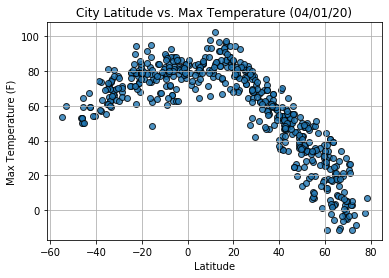

In [10]:
#### reference only for expected results  

In [ ]:
# create the scatter plot for Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


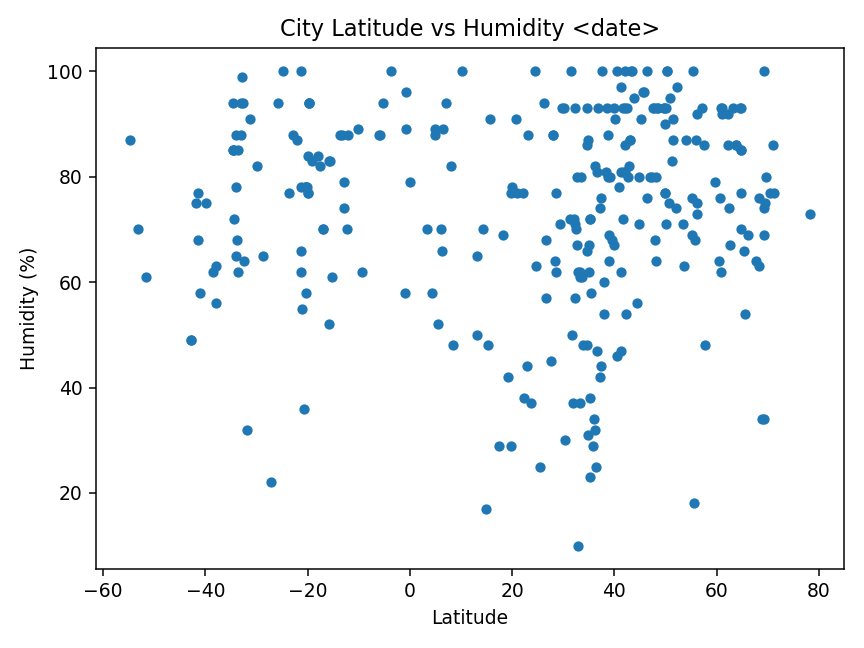

<function matplotlib.pyplot.close(fig=None)>

In [252]:
#### scatter plot using pandas --

cities_df.plot(kind="scatter", x='Lat', y='Humidity')

# Set a Title and labels
plt.title("City Latitude vs Humidity <date>")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Humidity_plot.png")

#plt.legend()
plt.close

In [220]:
temp_hum=cities_df['Humidity']
temp_hum

0       62
1      100
2       32
3       88
4       74
      ... 
289     64
290     74
291     67
292     81
293     78
Name: Humidity, Length: 294, dtype: int64

In [221]:
# get Temperatrue min & max for y axis
min_humidity = temp_hum.min()
min_humidity

10

In [222]:
max_humidity = temp_hum.max()
max_humidity

100

In [223]:
cities_df.columns

Index(['City ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat',
       'Lng', 'Max Temp', 'Wind Speed'],
      dtype='object')

<IPython.core.display.Javascript object>


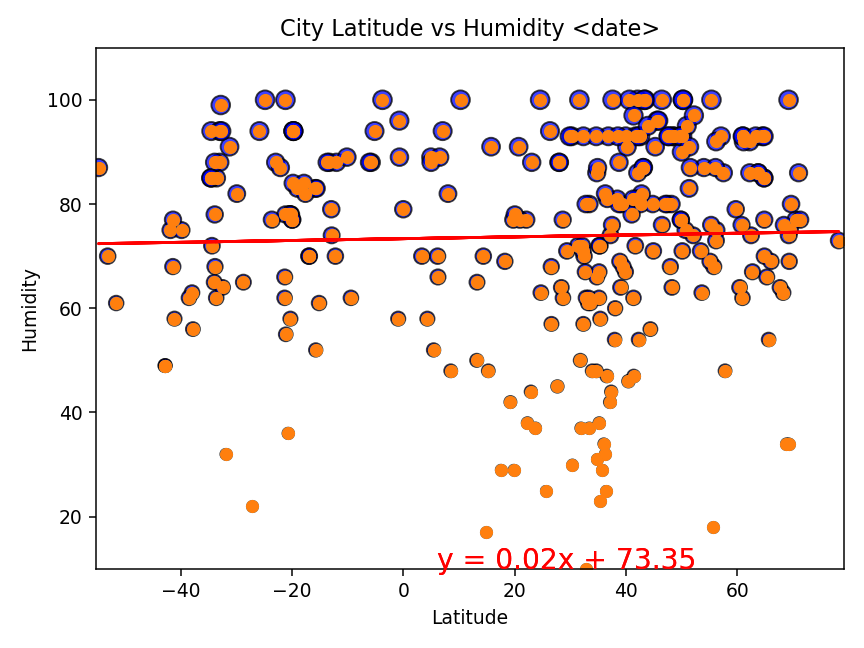

In [227]:
# Create Scatter Pot -- Latitude vs. Humidity Plot

# enable matplotlib so that the correlation / regression line can be drawn over the scatter plot

%matplotlib notebook 

#----------------------------------------------
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

from scipy.stats import sem
#----------------------------------------------

# variables for chart data
x_data = cities_df['Lat']
y_data = cities_df['Humidity']

#----------------------------------------------

# The maximum x value for our chart will be 25
x_limit = max_lat

# List of values 
x_axis = np.arange(min_lat, x_limit, 2)

# Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]

# Tells matplotlib to create a scatter plot
# The size of each point on our plot is determined by their x value

plt.scatter(x_data, y_data, marker="o", facecolors="blue", edgecolors="black", s=y_data, alpha=0.75)
            
# x limits of scatter plot
plt.xlim(min_lat-0.5, max_lat+0.9)   

# y limits of scatter plot
plt.ylim(min_humidity-0.1, max_humidity+10)

# Set a Title and labels
plt.title("City Latitude vs Humidity <date>")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# tigh_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Humidity_plot.png")

plt.show()

#plt.close 

In [228]:
#create the scatter plot - line
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

lats = cities_df['Lat']
hums = cities_df['Humidity']

correlation = st.pearsonr(lats, hums)
correlation

(0.030198765296615263, 0.6060550495334496)

In [230]:
# Add the linear regression equation and line to plot
x_values = cities_df['Lat']
y_values = cities_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("City Latitude vs Humidity <date>")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Images/Lat_vs_Humidity_with_line_plot.png")

plt.show()

## Latitude vs. Humidity Plot

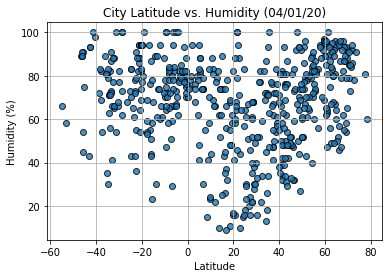

In [11]:
#### reference only for expected results  

In [ ]:
# create the scatter plot for Latitude vs. Cloudiness Plot

## Latitude vs. Cloudiness Plot

In [238]:
temp=cities_df['Cloudiness']
temp

0      100
1       90
2        1
3        0
4        0
      ... 
289     20
290     75
291      0
292     75
293     14
Name: Cloudiness, Length: 294, dtype: int64

In [239]:
# get Cloudiness min & max for x/y axis
min_cloudiness = temp.min()
min_cloudiness

0

In [240]:
# get Cloudiness for x/y axis
max_cloudiness = temp.max()
max_cloudiness

100

<IPython.core.display.Javascript object>


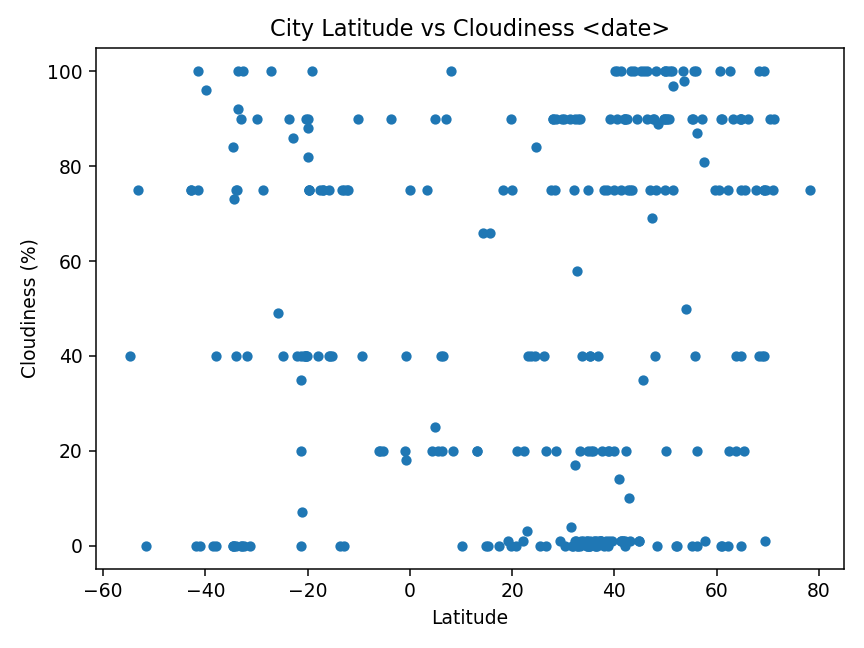

<function matplotlib.pyplot.close(fig=None)>

In [254]:
#### scatter plot using pandas --

cities_df.plot(kind="scatter", x='Lat', y='Cloudiness')

# Set a Title and labels
plt.title("City Latitude vs Cloudiness <date>")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Cloudiness_plot.png")

#plt.legend()
plt.close

<IPython.core.display.Javascript object>


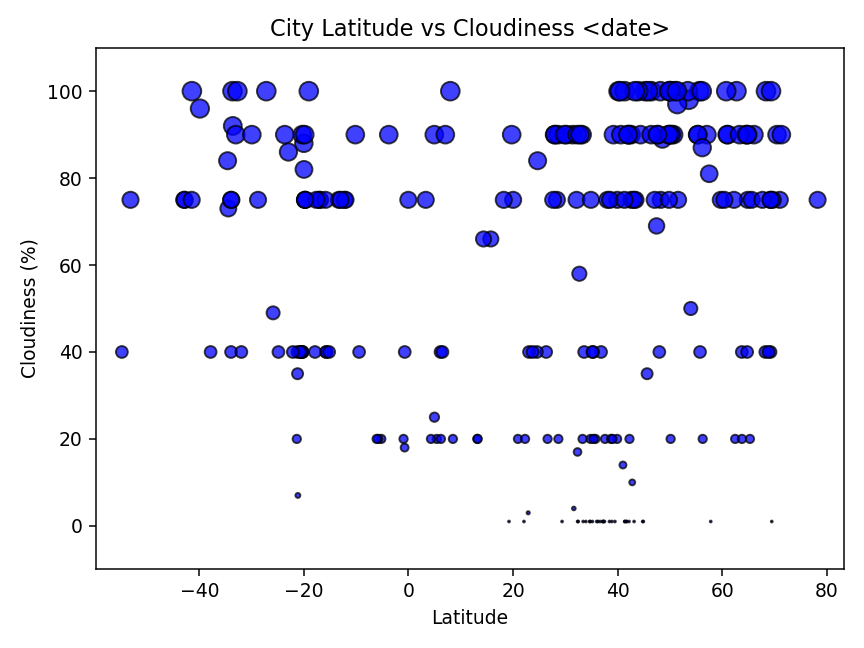

In [245]:
# Create Scatter Pot -- Latitude vs. Cloudiness Plot

# enable matplotlib so that the correlation / regression line can be drawn over the scatter plot

%matplotlib notebook 

#----------------------------------------------
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

from scipy.stats import sem
#----------------------------------------------

# variables for chart data
x_data = cities_df['Lat']
y_data = cities_df['Cloudiness']

#----------------------------------------------

# The maximum x value for our chart will be 25
x_limit = lat_max

# List of values 
x_axis = np.arange(0, x_limit, 2)

# Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]

# Tells matplotlib to create a scatter plot
# The size of each point on our plot is determined by their x value

plt.scatter(x_data, y_data, marker="o", facecolors="blue", edgecolors="black", s=y_data, alpha=0.75)
            
# x limits of scatter plot
plt.xlim(min_lat-5, max_lat+5)   

# y limits of scatter plot
plt.ylim(min_cloudiness-10, max_cloudiness+10)

# Set a Title and labels
plt.title("City Latitude vs Cloudiness <date>")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Cloudiness_plot.png")

plt.show()

#plt.close 

In [242]:
#create the scatter plot - line
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

lats = cities_df['Lat']
hums = cities_df['Cloudiness']

correlation = st.pearsonr(lats, hums)
correlation

(0.07692691561620808, 0.18839141071911858)

In [243]:
# Add the linear regression equation and line to plot
x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("City Latitude vs Cloudiness <date>")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/Lat_vs_Cloudiness_with-line_plot.png")

plt.show()

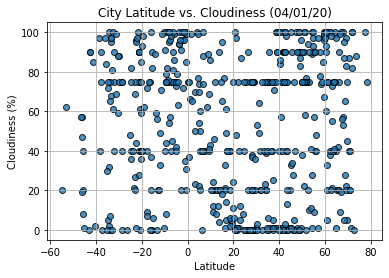

In [12]:
#### reference only for expected results  

In [ ]:
# create the scatter plot for Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


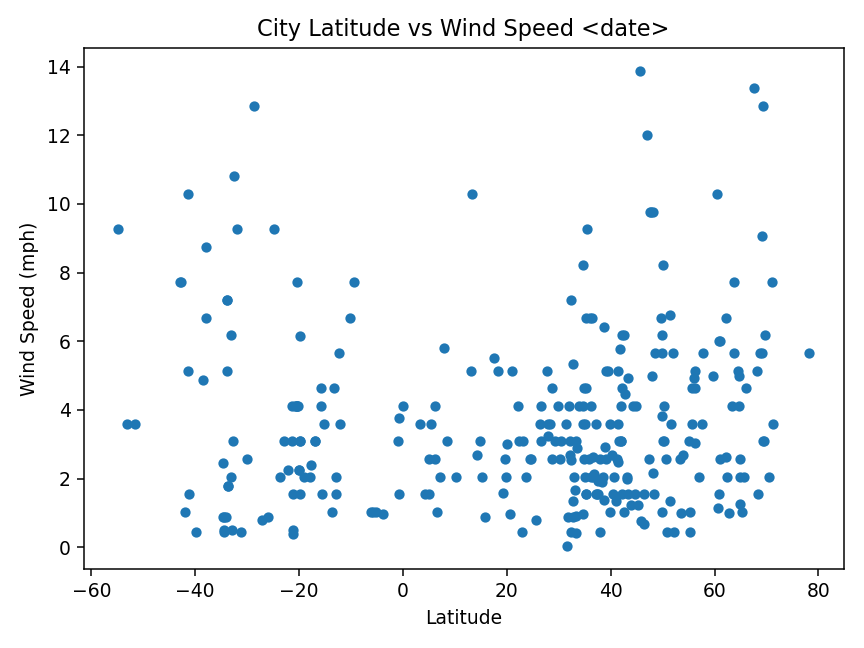

<function matplotlib.pyplot.close(fig=None)>

In [256]:
#### scatter plot using pandas --

cities_df.plot(kind="scatter", x='Lat', y='Wind Speed')

# Set a Title and labels
plt.title("City Latitude vs Wind Speed <date>")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_WindSpeed_plot.png")

#plt.legend()
plt.close

## Latitude vs. Wind Speed Plot

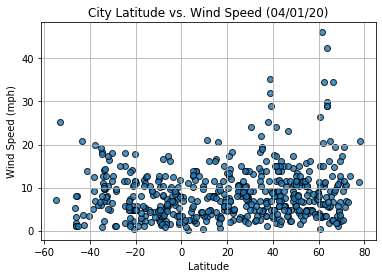

In [13]:
#### reference only for expected results  

In [ ]:
# create the Linear Regression -- Northern Hemisphere - Max Temp vs. Latitude Linear Regression¶

## Linear Regression

In [24]:
#### reference only for expected results  

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


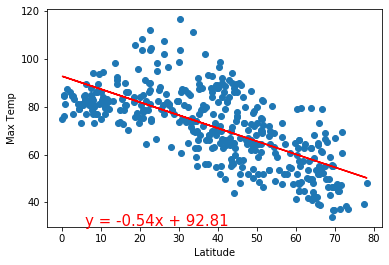

In [25]:
#### reference only for expected results  

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


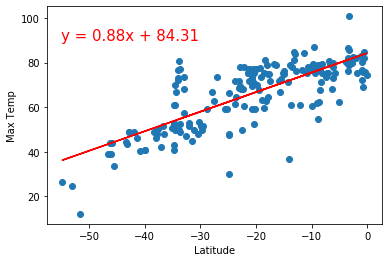

In [26]:
#### reference only for expected results  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


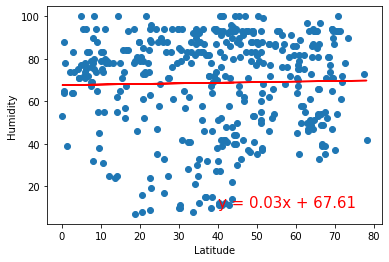

In [27]:
#### reference only for expected results  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


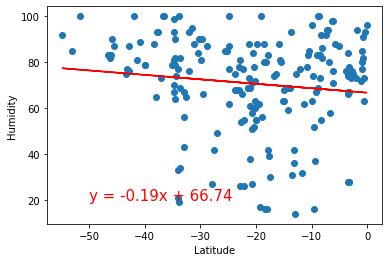

In [28]:
#### reference only for expected results  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


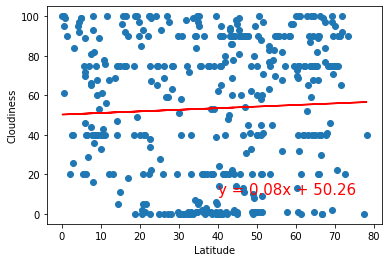

In [29]:
#### reference only for expected results  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


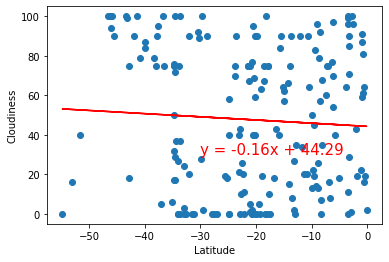

In [30]:
#### reference only for expected results  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


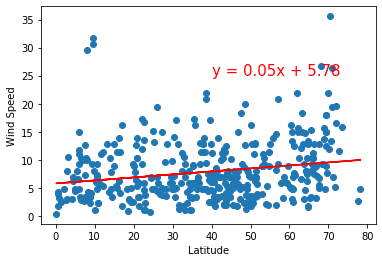

In [31]:
#### reference only for expected results  

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


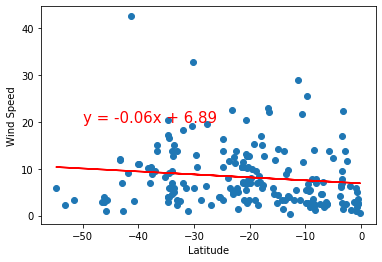

In [32]:
#### reference only for expected results  